# Detecting Covid-19 with Keras neural network

## 0. Import and loading

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
covid_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\images\Covid-19'
normal_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\images\Normal'
viral_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\images\Viral'
paths = [covid_path, normal_path, viral_path]

In [4]:
%%time
X=[]
y=[]
for i in range(len(paths)):
    images = [f for f in os.listdir(paths[i])]
    for image in images:
        img = load_img(paths[i]+'\\\\'+image, target_size=(250, 250))
        img = img_to_array(img)
        X.append(img)
        y.append(i)
print(X)
print(y)

[array([[[ 56.,  54.,  55.],
        [ 60.,  60.,  60.],
        [ 63.,  63.,  65.],
        ...,
        [ 82.,  82.,  84.],
        [ 91.,  91.,  93.],
        [ 56.,  54.,  58.]],

       [[ 53.,  51.,  52.],
        [ 58.,  58.,  59.],
        [ 66.,  66.,  68.],
        ...,
        [102., 103., 105.],
        [ 81.,  81.,  83.],
        [ 61.,  59.,  62.]],

       [[ 57.,  55.,  56.],
        [ 54.,  53.,  53.],
        [ 64.,  63.,  65.],
        ...,
        [ 55.,  53.,  54.],
        [ 57.,  55.,  57.],
        [ 54.,  52.,  54.]],

       ...,

       [[ 76.,  75.,  77.],
        [ 68.,  68.,  70.],
        [ 74.,  74.,  76.],
        ...,
        [ 91.,  92.,  94.],
        [ 85.,  83.,  86.],
        [101., 102., 104.]],

       [[ 93.,  91.,  94.],
        [ 65.,  65.,  67.],
        [ 61.,  61.,  63.],
        ...,
        [ 96.,  96.,  98.],
        [ 73.,  73.,  75.],
        [ 90.,  91.,  93.]],

       [[ 85.,  85.,  87.],
        [ 73.,  73.,  75.],
        [ 63., 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [8]:
#abbiamo verificato che lo split mantiene inalterate le proporzioni
import pandas as pd

print('all:')
print(pd.Series(y).value_counts(normalize=True))
print()
print('train:')
print(pd.Series(y_train).value_counts(normalize=True))
print()
print('test:')
print(pd.Series(y_test).value_counts(normalize=True))

all:
2    0.465237
1    0.463853
0    0.070910
dtype: float64

train:
2    0.465398
1    0.463668
0    0.070934
dtype: float64

test:
2    0.464594
1    0.464594
0    0.070812
dtype: float64


In [9]:
from keras.utils.np_utils import to_categorical
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

In [10]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train_labels, y_test_labels =  np.array(y_train_labels), np.array(y_test_labels)

## 1. Our models

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D
from keras.optimizers import RMSprop

In [27]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', 
                                                  np.unique(y_train),
                                                  y_train)

for _class in np.unique(y_train):
    print(f"Weight of instances in class {_class:d}: {class_weights[_class]:.2f}")

Weight of instances in class 0: 4.70
Weight of instances in class 1: 0.72
Weight of instances in class 2: 0.72


In [42]:
model = Sequential()

model.add( Conv2D(32, (3, 3), input_shape=(250, 250, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(128, (3, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(256, (3, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Flatten() )
model.add( Dense(128) )
model.add( Activation("relu") )

model.add(Dense(3, activation='softmax'))

model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [43]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
activation_13 (Activation)   (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 59, 59, 128)      

## 2. Fitting

In [30]:
hist = model.fit(X_train, y_train_labels, 
                 class_weight=class_weights,
                 batch_size=32, epochs=100)

Epoch 1/10
2312/2312 [==============================] - 31s 13ms/step - loss: 33.9073 - accuracy: 0.4606
Epoch 2/10
2312/2312 [==============================] - 31s 13ms/step - loss: 1.0563 - accuracy: 0.4589
Epoch 3/10
2312/2312 [==============================] - 30s 13ms/step - loss: 1.0296 - accuracy: 0.4654
Epoch 4/10
2312/2312 [==============================] - 31s 13ms/step - loss: 1.0067 - accuracy: 0.4641
Epoch 5/10
2312/2312 [==============================] - 29s 13ms/step - loss: 0.9868 - accuracy: 0.4654
Epoch 6/10
2312/2312 [==============================] - 30s 13ms/step - loss: 0.9704 - accuracy: 0.4550
Epoch 7/10
2312/2312 [==============================] - 29s 13ms/step - loss: 0.9569 - accuracy: 0.4503
Epoch 8/10
2312/2312 [==============================] - 30s 13ms/step - loss: 0.9457 - accuracy: 0.4520
Epoch 9/10
2312/2312 [==============================] - 30s 13ms/step - loss: 0.9361 - accuracy: 0.4611
Epoch 10/10
2312/2312 [==============================] - 31s 13

## 3. Evaluation

Accuracy: 0.4649654


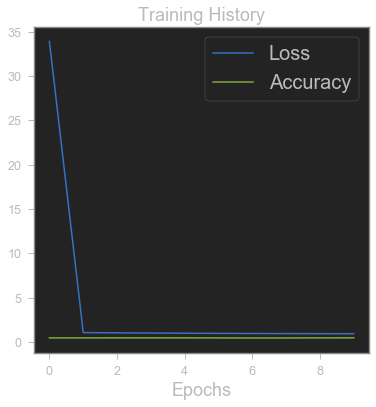

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['loss'], label='Loss')
axes.plot(hist.history['accuracy'], label='Accuracy')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ("Accuracy:", hist.history['accuracy'][-1])

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# convert form prediction to id
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

y_true = y_test

# compute confusion matrix
print ("Confusion Matrix")
print ( confusion_matrix(y_true, y_pred) )
print()

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

Confusion Matrix
[[  0   9  32]
 [  0 250  19]
 [  0  27 242]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.87      0.93      0.90       269
           2       0.83      0.90      0.86       269

    accuracy                           0.85       579
   macro avg       0.57      0.61      0.59       579
weighted avg       0.79      0.85      0.82       579



C:\Users\basil\Anaconda3\envs\BDASM\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
#comando per salvare il modello
classifier.save(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\model')

# Augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
                                ##augmentation parameters:
                                  # ,shear_range=0.2, 
                                  # zoom_range=0.2, 
                                  # horizontal_flip=True)
                                  
train_images = train_datagen.flow_from_directory(train_path,
                     target_size=(256, 256),
                     batch_size=32,
                     color_mode="rgb",
                     class_mode="categorical"
                     #shuffle=True,
                     #seed=42
                            )